<a href="https://colab.research.google.com/github/SergiGR28/SSN/blob/main/Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starting Simulations at  237  different temperatures.
Simulation  1  of 237  at reduced temperature T= 2.970792625527701
Simulation  2  of 237  at reduced temperature T= 1.7026216827390923
Simulation  3  of 237  at reduced temperature T= 3.054876257114677
Simulation  4  of 237  at reduced temperature T= 2.4333987766554435
Simulation  5  of 237  at reduced temperature T= 2.579321126254766
Simulation  6  of 237  at reduced temperature T= 1.452179232541615
Simulation  7  of 237  at reduced temperature T= 2.5278742097508275
Simulation  8  of 237  at reduced temperature T= 2.556663007932437
Simulation  9  of 237  at reduced temperature T= 1.6777524771448222
Simulation  10  of 237  at reduced temperature T= 1.5752518366884285
Simulation  11  of 237  at reduced temperature T= 2.2693142926012495
Simulation  12  of 237  at reduced temperature T= 1.2038085009329853
Simulation  13  of 237  at reduced temperature T= 1.5259166082945639
Simulation  14  of 237  at reduced temperature T= 3.69832072559

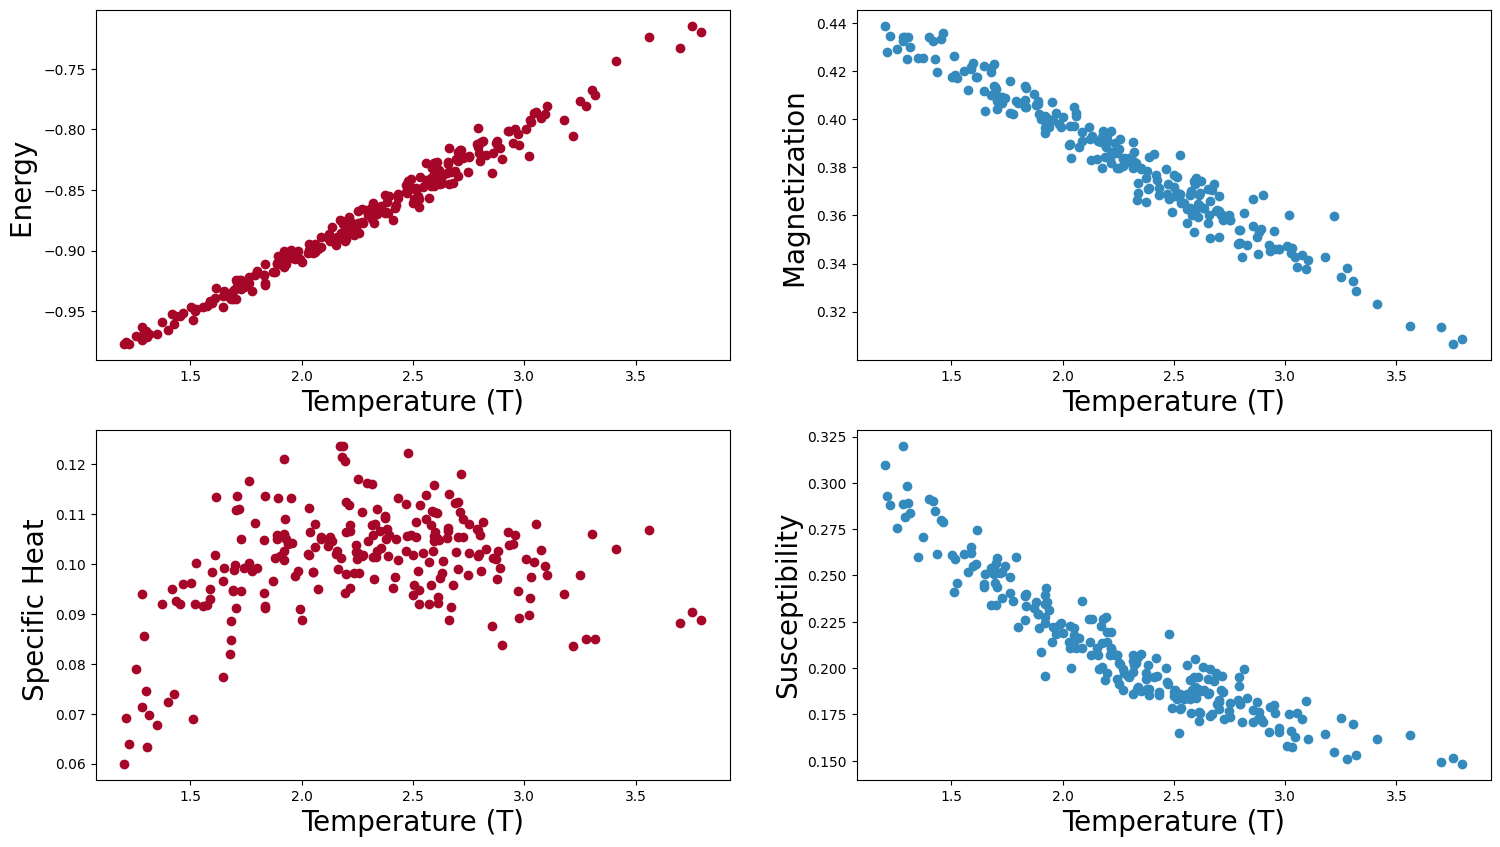

In [2]:
#Introduccio al metode montecarlo
#Model Ising 1D
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

H=2 #Camp magnetic
J=-1 #Spin

#Generation of a random initial state for N spins
def initialstate(N):
    ''' generates a random spin configuration for initial condition'''
    state = 2*np.random.randint(2, size=N)-1
    return state

#Definim les interaccions i les solucions del model
def mcmove(config, beta):
    '''Monte Carlo move using Metropolis algorithm '''
    for i in range(N):
                #select random spin from N system
                a = np.random.randint(0, N)
                s =  config[a]
                #calculate energy cost of this new configuration (the % is for calculation of periodic boundary condition)
                nb = config[(a+1)%N] + config[(a-1)%N]
                cost = 2*s*(J*nb+H)
                #flip spin or not depending on the cost and its Boltzmann factor
                ## (acceptance probability is given by Boltzmann factor with beta = 1/kBT
                if cost < 0:
                    s *= -1
                elif rand() < np.exp(-cost*beta):
                    s *= -1
                config[a] = s
    return config

#This function calculates the energy of a given configuration for the plots of Energy as a function of T
def calcEnergy(config):
    '''Energy of a given configuration'''
    energy = 0
    for i in range(len(config)):
            S = config[i]
            nb = config[(i+1)%N]
            energy += -J*nb*S-S*H
    return energy

#This function calculates the magnetization of a given configuration
def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag

#
# MAIN PROGRAM
#
# Initial parameters for calculation
## change the parameter below if you want to simulate a smaller system
nt      = 2**8        # number of temperature points
N       = 2**4        # size of the lattice, N x N
eqSteps = 2**10       # number of MC sweeps for equilibration
mcSteps = 2**10       # number of MC sweeps for calculation

n1, n2  = 1.0/(mcSteps*N), 1.0/(mcSteps*mcSteps*N)
#Generate a random distribution of temperatures to make an exploration
tm = 2.269;    T=np.random.normal(tm, .64, nt)
T  = T[(T>1.2) & (T<3.8)];    nt = np.size(T)

Energy       = np.zeros(nt);   Magnetization  = np.zeros(nt)
SpecificHeat = np.zeros(nt);   Susceptibility = np.zeros(nt)


#----------------------------------------------------------------------
#  SIMULATION LOOP
#----------------------------------------------------------------------
print('Starting Simulations at ',len(T),' different temperatures.')
for m in range(len(T)):
    E1 = M1 = E2 = M2 = 0
    config = initialstate(N)
    iT=1.0/T[m]
    iT2=iT*iT
    print('Simulation ',m+1,' of',len(T),' at reduced temperature T=',T[m])

    for i in range(eqSteps):         # equilibrate
        mcmove(config, iT)           # Monte Carlo moves

    for i in range(mcSteps):
        mcmove(config, iT)
        Ene = calcEnergy(config)     # calculate the energy
        Mag = calcMag(config)        # calculate the magnetisation

        E1 = E1 + Ene
        M1 = M1 + Mag
        M2 = M2 + Mag*Mag
        E2 = E2 + Ene*Ene

        Energy[m]         = n1*E1
        Magnetization[m]  = n1*M1
        SpecificHeat[m]   = (n1*E2 - n2*E1*E1)*iT2
        Susceptibility[m] = (n1*M2 - n2*M1*M1)*iT

#
# Plot everything
#

f = plt.figure(figsize=(18, 10)); # plot the calculated values

sp =  f.add_subplot(2, 2, 1 );
plt.plot(T, Energy, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(2, 2, 2 );
plt.plot(T, abs(Magnetization), 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization ", fontsize=20);

sp =  f.add_subplot(2, 2, 3 );
plt.plot(T, SpecificHeat, 'o', color="#A60628");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Specific Heat ", fontsize=20);

sp =  f.add_subplot(2, 2, 4 );
plt.plot(T, Susceptibility, 'o', color="#348ABD");
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()